In [3]:
data_dir = "/data/projects/dschaub/ANCA-GN_transcriptomics/data/single-cell/exploratory"
working_dir = "/data/projects/dschaub/ANCA-GN_transcriptomics"

In [4]:
%load_ext autoreload
%autoreload 2

import os
os.chdir(working_dir)

import yaml
import anndata as ad
import matplotlib.pyplot as plt
import mudata as md
import numpy as np
import scanpy as sc
from scipy import sparse
from matplotlib.colors import LinearSegmentedColormap
import matplotlib as mpl
from matplotlib import font_manager

from utils.utils import *
from utils.plotting import *
from utils.markers import *

sc.settings.verbosity = 0
sc.settings._vector_friendly = True

font_dirs = "/usr/share/fonts/truetype/msttcorefonts/"
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

plt.rcParams['font.family'] = "arial"
plt.rcParams['font.size'] = 12
# sc.set_figure_params(transparent=True)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load data

In [5]:
path = os.path.join(
    data_dir, "ANCA_exploratory_27PK27PB_Tcells_HarmonyR_annotated.h5mu"
)
mudata = md.read_h5mu(path)
mod_rna = mudata.mod["rna"]
mod_cite = mudata.mod["cite"]

path = os.path.join(
    data_dir, "ANCA_exploratory_27PK27PB_CD4Teff_annotated.h5mu"
)
mudata_cd4 = md.read_h5mu(path)
mod_rna_cd4 = mudata_cd4.mod["rna"]
mod_cite_cd4 = mudata_cd4.mod["cite"]

path = os.path.join(
    data_dir, "ANCA_exploratory_27PK27PB_CD8Teff_annotated.h5mu"
)
mudata_cd8 = md.read_h5mu(path)
mod_rna_cd8 = mudata_cd8.mod["rna"]
mod_cite_cd8 = mudata_cd8.mod["cite"]

In [10]:
mod_rna_cd4.obs

,patient,sample,tissue,cell_type_yu,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,...,leiden_1.5,leiden_1.6,leiden_1.7,leiden_1.8,leiden_1.9,cell_type,leiden_0.1,leiden_0.2,leiden_2.0,cell_type_fine
E016K_AACTCTTTCATGTGGT,E016,E016K,K,CD4 EM/RM,650,649,1428.0,80.0,5.602241,384.0,...,14,15,20,16,29,CD4+ EM/RM,0,0,24,Tc1-like
E016K_AAGACCTTCCGTACAA,E016,E016K,K,CD4 EM/RM,782,779,1763.0,49.0,2.779353,503.0,...,3,3,2,12,8,CD4+ EM/RM,0,0,4,Th1
E016K_AAGCCGCAGTTCGCGC,E016,E016K,K,CD4 EM/RM,734,730,1667.0,35.0,2.099580,503.0,...,13,14,22,17,5,CD4+ EM/RM,0,0,9,Tfh
E016K_AATCGGTCAAATTGCC,E016,E016K,K,CD4 EM/RM,599,598,1606.0,41.0,2.552927,632.0,...,0,6,0,0,1,CD4+ EM/RM,0,1,15,Tfh
E016K_ACACCAAGTTTCGCTC,E016,E016K,K,CD4 EM/RM,667,666,1626.0,76.0,4.674047,503.0,...,24,11,23,23,25,CD4+ EM/RM,0,1,23,Tfh
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
E015B_TTCGAAGAGTGCCATT-1,E015,E015B,B,CD4/CD8 CM,1572,1570,4649.0,44.0,0.946440,1779.0,...,11,9,19,22,23,CD4+ EM/RM,0,0,7,Th17
E015B_TTCGGTCCACGAAGCA-1,E015,E015B,B,CD4 EM/RM,1292,1292,2609.0,40.0,1.533154,520.0,...,6,7,4,30,30,CD4+ EM/RM,0,1,34,Tfh
E015B_TTCTACAGTGTAACGG-1,E015,E015B,B,CD4/CD8 CM,1681,1676,4747.0,31.0,0.653044,1815.0,...,11,9,19,22,23,CD4+ EM/RM,0,0,7,Th17
E015B_TTCTTAGGTTCGGCAC-1,E015,E015B,B,CD4 EM/RM,902,902,1706.0,39.0,2.286049,458.0,...,6,7,4,30,30,CD4+ EM/RM,0,1,34,Tfh


In [11]:
mod_rna.obs.patient.unique()

['E016', 'E013', 'E025', 'E022', 'E014', ..., 'E007', 'E019', 'E009', 'E027', 'E015']
Length: 27
Categories (27, object): ['E016', 'E013', 'E025', 'E022', ..., 'E019', 'E009', 'E027', 'E015']

## Merge data

In [12]:
mod_rna_cd4.X = mod_rna_cd4.layers["log1p"].copy()
sc.pp.scale(mod_rna_cd4)
mod_rna_cd4.layers["scaled"] = mod_rna_cd4.X.copy()

mod_rna_cd8.X = mod_rna_cd8.layers["log1p"].copy()
sc.pp.scale(mod_rna_cd8)
mod_rna_cd8.layers["scaled"] = mod_rna_cd8.X.copy()


mod_cite_cd4.X = mod_cite_cd4.layers["clr"].copy()
sc.pp.scale(mod_cite_cd4)
mod_cite_cd4.layers["scaled"] = mod_cite_cd4.X.copy()

mod_cite_cd8.X = mod_cite_cd8.layers["clr"].copy()
sc.pp.scale(mod_cite_cd8)
mod_cite_cd8.layers["scaled"] = mod_cite_cd8.X.copy()

In [13]:
mod_rna.obs["cell_type_v1_merged"] = mod_rna.obs["cell_type_v1"].astype(str)
mod_rna.obs.loc[mod_rna_cd4.obs_names, "cell_type_v1_merged"] = mod_rna_cd4.obs[
    "cell_type_fine"
].astype(str)

mod_rna.obs.loc[mod_rna_cd8.obs_names, "cell_type_v1_merged"] = mod_rna_cd8.obs[
    "cell_type_fine"
].astype(str)

mod_rna.obs["cell_type_v1_merged"] = mod_rna.obs["cell_type_v1_merged"].astype(
    "category"
)

In [14]:
def apply_map(input_list, mapping):
    return [mapping[x] for x in input_list]

In [15]:
celltype_col = "cell_type"
celltype_col = "cell_type_v1"

celltype_map = dict(zip(mod_rna.obs["cell_type"], mod_rna.obs[celltype_col]))

## Patient mixing

In [16]:
color_map = {
    "CD4+ naive": "#1f77b4",
    "CD4+/CD8+ CM": "#ff7f0e",
    "NKT/CTL": "#279e68",
    "CD4+ EM/RM": "#d62728",
    "CD8+ EM/RM": "#aa40fc",
    "CD8+ CM/EM": "#8c564b",
    "CD4+/CD8+ stressed": "#e377c2",
    "Treg": "#b5bd61",
    "CD8+ naive": "#17becf",
    "MAIT": "#ffbb78",
    "Prolif.": "#98df8a",
    "NKT": "#aec7e8",
    "gdT": "#c5b0d5",
    "CD4+ CM": "#ff9896",
    "NK": "#c49c94",
}
color_map = {celltype_map[k]: v for k, v in color_map.items()}

order = [
    "CD4+ EM/RM",
    "CD8+ EM/RM",
    "CD4+ naive",
    "CD4+ CM",
    "CD8+ naive",
    "CD8+ CM/EM",
    "CD4+/CD8+ CM",
    "CD4+/CD8+ stressed",
    "Treg",
    "gdT",
    "MAIT",
    "NKT/CTL",
    "NKT",
    "NK",
    "Prolif.",
]
order = [celltype_map[x] for x in order]

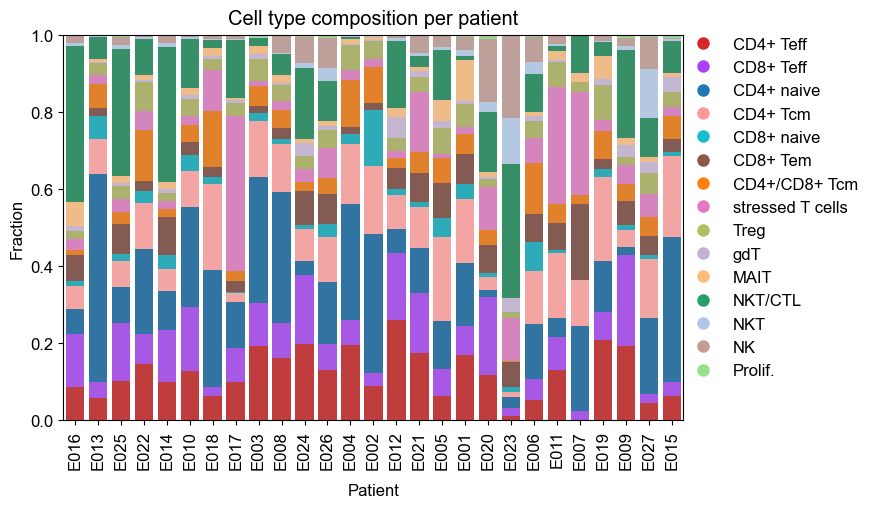

In [18]:
colors = [color_map[x] for x in order]
plot_cluster_composition_per_sample(
    mod_rna,
    colors,
    celltype_col,
    order=order,
    save_path="figures/supp/exploratory_celltype_comp_per_patient.pdf",
    title_pad=8,
)

## Quality control

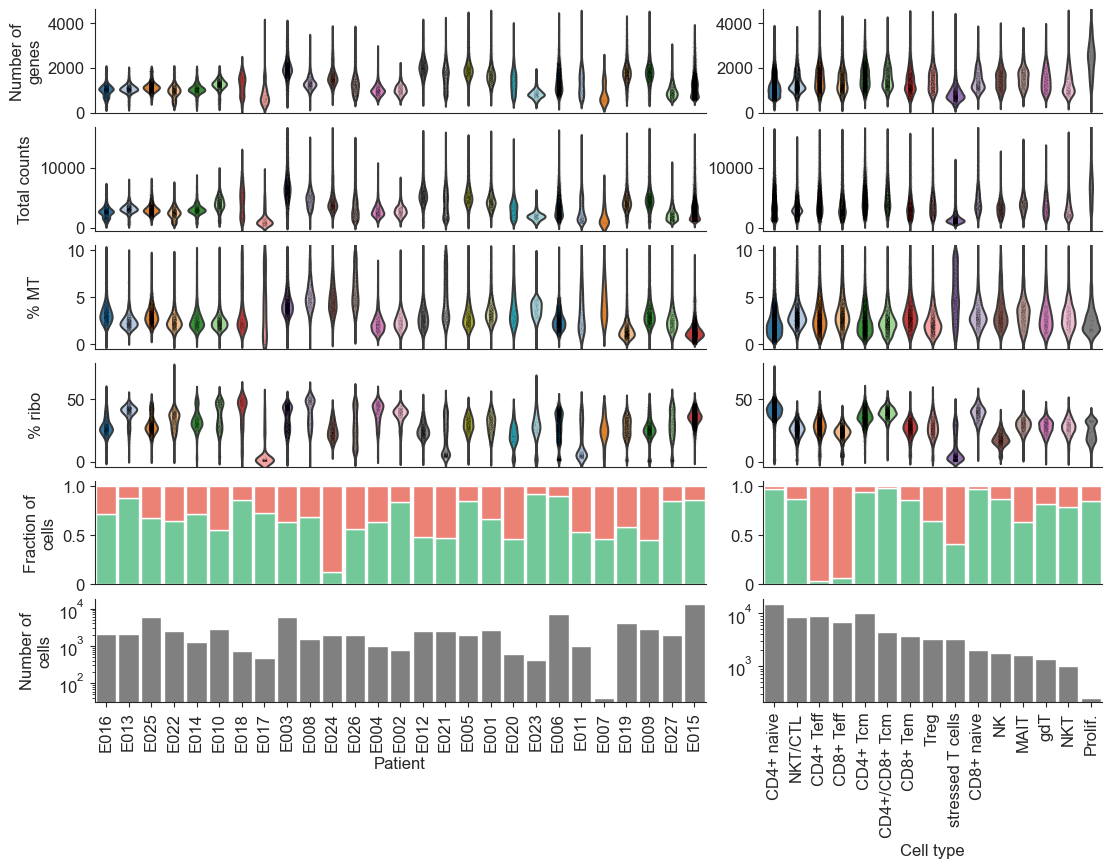

In [21]:
plot_qc(
    mod_rna,
    cell_type_key=celltype_col,
    save_path="figures/supp/exploratory_qc.pdf",
    # log_scale=False,
    hspace=0.14,
)

# Marker dotplots

In [22]:
path = os.path.join(data_dir, "..", "T_cell_markers.xlsx")
marker_df = pd.read_excel(path)
marker_df = marker_df.set_index("Cell type")

# extract positive markers
marker_db = {}
for index, row in marker_df.iterrows():
    pos_markers_1 = (
        row["positive markers 1"].replace(" ", "").split(",")
        if row["positive markers 1"] is not np.nan
        else []
    )
    pos_markers_2 = (
        row["positive markers 2"].replace(" ", "").split(",")
        if row["positive markers 2"] is not np.nan
        else []
    )
    marker_db[index] = list(set(pos_markers_1 + pos_markers_2))

marker_plotter = MarkerPlotter(mod_rna, mod_cite, marker_db, cluster_key=celltype_col)

marker_plotter = MarkerPlotter(
    mod_rna, mod_cite, marker_db, cluster_key="cell_type_v1_merged"
)

In [ ]:
# marker_plotter.visualize_markers(markers=["CD3D", "CD3E"])

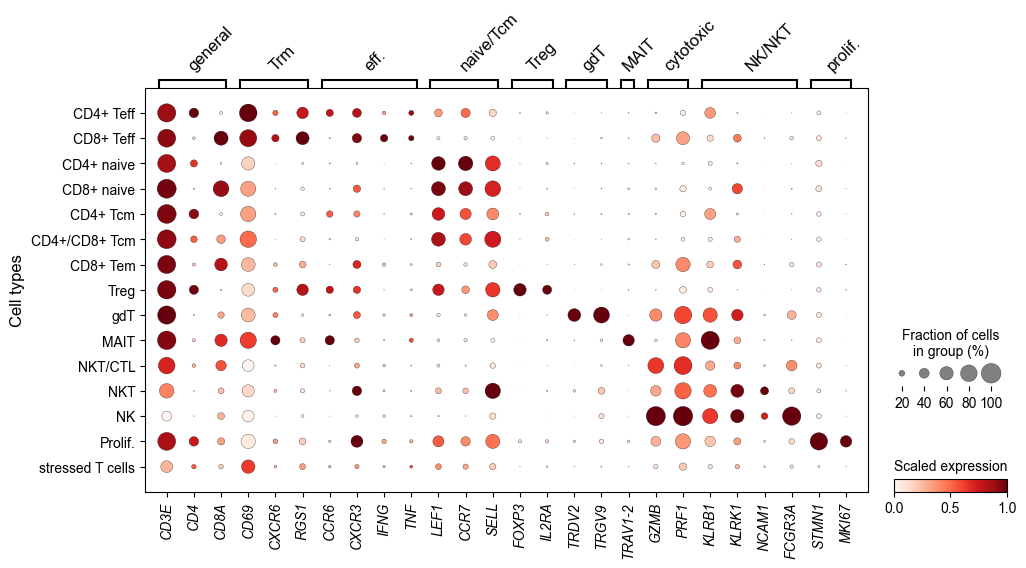

In [23]:
celltype_order = [
    "CD4+ EM/RM",
    "CD8+ EM/RM",
    "CD4+ naive",
    "CD8+ naive",
    "CD4+ CM",
    "CD4+/CD8+ CM",
    "CD8+ CM/EM",
    "Treg",
    "gdT",
    "MAIT",
    "NKT/CTL",
    "NKT",
    "NK",
    "Prolif.",
    "CD4+/CD8+ stressed",
]
celltype_order = apply_map(celltype_order, celltype_map)
dotplot_markers(
    mod_rna,
    celltype_col=celltype_col,
    celltype_order=celltype_order,
    scaled=False,
    marker_dict=get_markers_tcell(),
    # title="Broad T cell markers",
    pad=50,
    rotation=45,
    save_path="figures/supp/exploratory_tcell_markers.pdf",
)

## CD4 subset RNA

In [24]:
cmap_cd4 = {
    "Th17": "#7B1717",
    "Th1": "#A91F1F",
    "Tfh": "#E0B093",
    "Th1-like": "#D62728",
    "Tc1-like": "#D2D2D2",
}

labels_cd4 = [
    "Th17",
    "Th1",
    "Th1-like",
    "Tfh",
    "Tc1-like",
]

colors = [cmap_cd4[x] for x in labels_cd4]
orig_col = mod_rna_cd4.obs["cell_type_fine"].copy()
mod_rna_cd4.obs["cell_type_umap"] = pd.Categorical(
    mod_rna_cd4.obs["cell_type_fine"], categories=labels_cd4, ordered=True
)

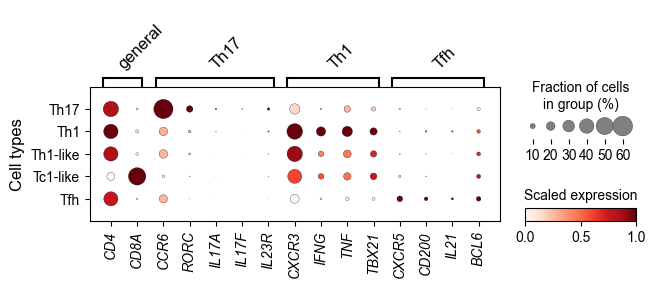

In [25]:
celltype_order = ["Th17", "Th1", "Th1-like", "Tc1-like", "Tfh"]

dotplot_markers(
    mod_rna_cd4,
    celltype_col="cell_type_fine",
    celltype_order=celltype_order,
    marker_dict=get_markers_cd4(),
    # title="CD4+ Teff markers",
    pad=25,
    scaled=False,
    figsize=(7, 3),
    # vmax=0.3,
    rotation=45,
    save_path="figures/supp/exploratory_cd4_markers.pdf",
)

## CD8 subset RNA

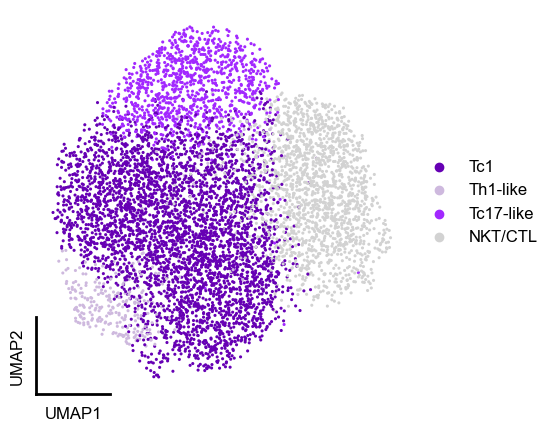

In [26]:
celltype_col_cd8 = "cell_type_fine_v1"
# celltype_col_cd8 = "cell_type_fine"

# cmap_cd8 = {
#     "Tc1": "#6600B4",
#     "Tc1-like": "#840AE2",
#     "Tc17-like": "#A228FF",
#     "Th1-like": "#CEB9DE",
#     "NKT/CTL": "#D2D2D2",
# }

# labels_cd8 = [
#     "Tc1",
#     "Tc1-like",
#     "Tc17-like",
#     "Th1-like",
#     "NKT/CTL",
# ]


cmap_cd8 = {
    "Tc1": "#6600B4",
    # "Tc1-like": "#840AE2",
    "Tc17-like": "#A228FF",
    "Th1-like": "#CEB9DE",
    "NKT/CTL": "#D2D2D2",
}

labels_cd8 = [
    "Tc1",
    "Th1-like",
    # "Tc1-like",
    "Tc17-like",
    "NKT/CTL",
]
colors = [cmap_cd8[x] for x in labels_cd8]
orig_col = mod_rna_cd8.obs[celltype_col_cd8].copy()
mod_rna_cd8.obs["cell_type_umap"] = pd.Categorical(
    mod_rna_cd8.obs[celltype_col_cd8], categories=labels_cd8, ordered=True
)
plot_umap(
    mod_rna_cd8,
    color="cell_type_umap",
    palette=colors,
    figsize=(5.5, 5),
    title="",
    size=20,
    # save_path="figures/main/exploratory_umap.pdf",
)

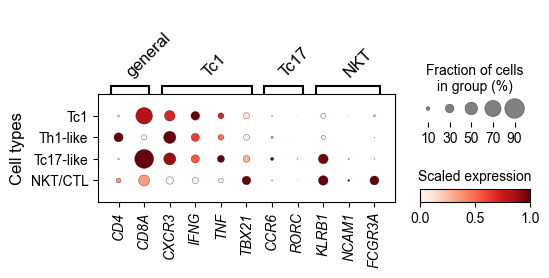

In [27]:
from collections import OrderedDict

celltype_col_cd8 = "cell_type_fine_v1"

celltype_order = ["Tc1", "Tc1-like", "Th1-like", "Tc17-like", "NKT/CTL"]
celltype_order = ["Tc1", "Th1-like", "Tc17-like", "NKT/CTL"]

markers = get_markers_cd8(mod_rna_cd8)
del markers["naive/Tcm"]

fig = dotplot_markers(
    mod_rna_cd8,
    celltype_col=celltype_col_cd8,
    celltype_order=celltype_order,
    marker_dict=markers,
    scaled=False,
    figsize=(5.0, 2.6),
    mod="rna",
    # title="CD8+ Teff markers",
    pad=25,
    rotation=45,
    # vmax=0.3,
    save_path="figures/supp/exploratory_cd8_markers.pdf",
    return_fig=True,
)
gene_ax = fig["gene_group_ax"]

## Gene scores

In [28]:
th1_genes = [
    "IFNG",
    "IL2",
    "TNF",
    "LTA",
    "CSF2",
    "IL18",
]
th2_genes = [
    "IL4",
    "IL5",
    "IL9",
    "IL13",
    # "IL10",
    # "IL21",
    # "IL6",
]
th17_genes = ["IL17A", "IL17F", "IL22", "IL26"]

gene_list = th1_genes + th2_genes + th17_genes

mod_rna.X = mod_rna.layers["scaled"].copy()

cytokine_markers = gene_list
sc.tl.score_genes(
    mod_rna,
    gene_list=cytokine_markers,
    score_name="cytokine_score",
    ctrl_size=50,
    use_raw=False,
)
sc.tl.score_genes(
    mod_rna,
    gene_list=th1_genes,
    score_name="type1_score",
    ctrl_size=50,
    use_raw=False,
)
sc.tl.score_genes(
    mod_rna,
    gene_list=th2_genes,
    score_name="type2_score",
    ctrl_size=50,
    use_raw=False,
)
sc.tl.score_genes(
    mod_rna,
    gene_list=th17_genes,
    score_name="type3_score",
    ctrl_size=50,
    use_raw=False,
)
mod_rna.X = mod_rna.layers["log1p"].copy()

In [29]:
scores = mod_rna.obs[["type1_score", "type2_score", "type3_score"]].copy()

In [30]:
mod_rna.obs[["type1_score", "type2_score", "type3_score"]] = scores.copy()

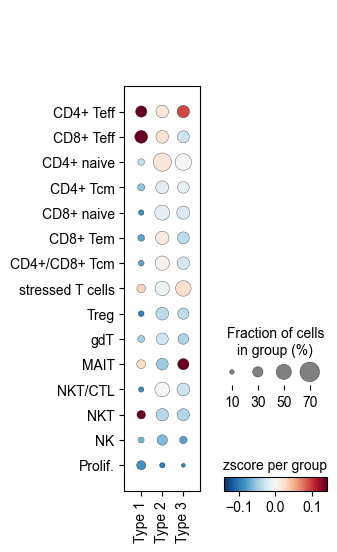

In [31]:
groupby = "cell_type_agg"
groupby = celltype_col

if groupby == "cell_type_agg":
    order = ["CD4+ Teff", "CD8+ Teff", "NKT/CTL", "CD4+ Tcm", "CD4+ naive", "others"]

    mod_rna.obs[groupby] = pd.Categorical(
        mod_rna.obs[groupby], categories=order, ordered=True
    )
else:
    order = [
        "CD4+ EM/RM",
        "CD8+ EM/RM",
        "CD4+ naive",
        "CD4+ CM",
        "CD8+ naive",
        "CD8+ CM/EM",
        "CD4+/CD8+ CM",
        "CD4+/CD8+ stressed",
        "Treg",
        "gdT",
        "MAIT",
        "NKT/CTL",
        "NKT",
        "NK",
        "Prolif.",
    ]
    order = [celltype_map[x] for x in order]
    mod_rna.obs[celltype_col] = pd.Categorical(
        mod_rna.obs[celltype_col], categories=order, ordered=True
    )
swap_axes = True
swap_axes = False
fig = sc.pl.dotplot(
    mod_rna,
    var_names=["type1_score", "type2_score", "type3_score"],
    # groupby="cell_type_agg",
    groupby=groupby,
    color_map="RdBu_r",
    vmin=-0.14,
    vmax=0.14,
    # return_fig=True,
    show=False,
    # title="",
    # size_title=0,
    figsize=(7, 1.5) if swap_axes else None,
    colorbar_title="zscore per group",
    swap_axes=swap_axes,
)
ax = fig["mainplot_ax"]
if swap_axes:
    ax.set_yticklabels(["Type 1", "Type 2", "Type 3"], rotation=0)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
else:
    ax.set_xticklabels(["Type 1", "Type 2", "Type 3"], rotation=90, ha="center")
plt.savefig(
    "figures/supp/exploratory_cytokine_score_dotplot.pdf",
    dpi=300,
    bbox_inches="tight",
    transparent=True,
)
plt.show()